In [1]:
from dedalus import public as de
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import animation

de.logging_setup.rootlogger.setLevel('ERROR')
%matplotlib inline

In [5]:
import subprocess
print(subprocess.check_output("find strat_conv_analysis", shell=True).decode())

strat_conv_analysis
strat_conv_analysis/strat_conv_analysis_s1.h5
strat_conv_analysis/strat_conv_analysis_s2.h5
strat_conv_analysis/strat_conv_analysis_s3.h5
strat_conv_analysis/strat_conv_analysis_s4.h5
strat_conv_analysis/strat_conv_analysis_s5.h5
strat_conv_analysis/strat_conv_analysis_s6.h5
strat_conv_analysis/strat_conv_analysis_s7.h5
strat_conv_analysis/strat_conv_analysis_s8.h5



In [6]:
import pathlib
from dedalus.tools import post
set_paths = list(pathlib.Path("strat_conv_analysis").glob("strat_conv_analysis_s*.h5"))
post.merge_sets("strat_conv_analysis/strat_conv_analysis.h5", set_paths, cleanup=True)

In [60]:
dx, dy = 0.2/256., 0.35/256.

x, y = np.mgrid[slice(0, 0.2, dx), slice(0, 0.35, dy)]

In [1]:
T[-1,:,:]

NameError: name 'T' is not defined

<HDF5 group "/scales/x" (1 members)>
<HDF5 dataset "T": shape (312, 256, 256), type "<f8">


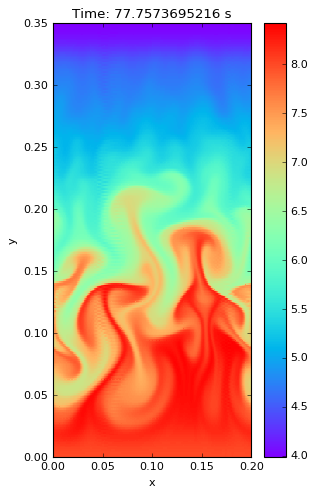

In [86]:
import h5py

fig = plt.figure(figsize=(4, 7))

with h5py.File("temp_salinity_7x2pm/temp_salinity_7x2pm_s1.h5", mode='r') as file:
    T = file['tasks']['T']
    ρ = file['tasks']['ρ']
    s = file['tasks']['s']
    t = file['scales']['sim_time']
    xp = file['scales']['x']
    yp = file['scales']['y']
    print(xp)
    print(T)
    
    p = plt.pcolormesh(x, y, T[-1,:,:], cmap = 'rainbow')
    plt.colorbar()
    plt.title('Time: '+ str(t[-1]) + ' s')
    plt.xlabel('x')
    plt.ylabel('y')
    
    
    
    #plt.legend(loc='upper right', fontsize=10)

In [79]:
def animar_dedalus(xm, ym, S, CMAP):
    fig, axis = plt.subplots(figsize=(4,7))
    p = axis.pcolormesh(xm, ym, S[0,:,:], cmap=CMAP)
    plt.colorbar(p)

    def init():
                print('update init')
                p.set_array(np.ravel(S[0,:-1,:-1]))
                return p

    def update(frame):
        p.set_array(np.ravel(S[frame, :-1, :-1]))
        plt.title(frame)
        return p

    anim = animation.FuncAnimation(fig, update, frames= [i for i in range(1,len(S))], init_func=init,  blit = False)
    plt.show()
    return anim

In [27]:
'hola' + str(2)

'hola2'

In [75]:
from dedalus.extras import plot_tools

In [ ]:
fig = plt.figure(figsize=(4, 7))

with h5py.File("strat_conv_analisys_70/strat_conv_analisys_70.h5", mode='r') as file:
    T = file['tasks']['T']
    ρ = file['tasks']['ρ']
    t = file['scales']['sim_time']
    xp = file['scales']['x']
    yp = file['scales']['y']
    print(xp)
    print(T)
    
    plt.pcolormesh(x, y, T[-1,:,:], cmap = 'rainbow')
    plt.colorbar()
    plt.title('Time: '+ str(t[-1]) + ' s')
    plt.xlabel('x')
    plt.ylabel('y')
    